## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  GAZİ KAĞAN SOYSAL - 2210356050

## Understanding Perceptron Learning Algorithm (100 points +5 points)

### 1. Data Loading and Exploration (5 points)

**Task:** 
The dataset contains the statistical distribution of pixel values ​​of the images of the coins. By calculating how effective these statistical features are, the new incoming coin image data will be used to determine whether the coins are real or fake. The Perceptron Learning algorithm will be used when making these calculations because this algorithm promises high accuracy in binary classification problems depending on how separable the data is.

In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
from IPython.display import Markdown, display

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 

# Features and target variables
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 
  
# metadata 
display(Markdown(f"**{'Metadata of Dataset'}**"))
print(banknote_authentication.metadata) 
  
# variable information 
display(Markdown(f"**{'Features of Variables'}**"))
print(banknote_authentication.variables) 

**Metadata of Dataset**

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

**Features of Variables**

       name     role        type demographic  \
0  variance  Feature  Continuous        None   
1  skewness  Feature  Continuous        None   
2  curtosis  Feature  Continuous        None   
3   entropy  Feature  Continuous        None   
4     class   Target     Integer        None   

                             description units missing_values  
0  variance of Wavelet Transformed image  None             no  
1  skewness of Wavelet Transformed image  None             no  
2  curtosis of Wavelet Transformed image  None             no  
3                       entropy of image  None             no  
4                                   None  None             no  


- The dataset consists of 4 statistical features determined according to the density distribution of pixels in the image of the coins. 
- These features are continuous values. 
- According to these features, it is stated that the coin is fake or real. The class of the coin is determined as 1 for real and 0 for fake.

In [3]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)

In [4]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
display(Markdown(f"**{'Features'}**"), X)
display(Markdown(f"**{'Targets'}**"), y)

**Features**

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


**Targets**

,class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


- The dataset consists of 1372 samples. There are enough examples to train the model.

In [5]:
## Check for any missing values and handle them if necessary.

# Summary statistics
display(Markdown(f"**{'SUMMARY STATISTICS'}**"))

summary_statistics = X.describe()
display(summary_statistics)

**SUMMARY STATISTICS**

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


- Features have different means, meaning features have different scales.

- Especially the variance of skewness and curtosis is seen as high. This shows the diversity of the data.

- Skewness and curtosis have extreme values. Perceptron algorithm is more affected by these values.

In [6]:
# Check for missing values
missing_values = X.isnull().sum()
print(missing_values)

variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64


* There are no missing values, not necessary to complete any data.

In [7]:
# Convert the DataFrame to a Numpy array
features = np.array(X)
targets = np.array(y)

- When applying the Perceptron algorithm, matrix operations will be used. Therefore, it is necessary to keep the data as an array.

### 2. Data Preprocessing (5 points)

In [8]:
# Changing class 0 with class -1
targets[targets == 0] = -1

- In the algorithm, the target variable is also used when updating the weights. If one of the classes is 0, it prevents the weights from being updated. For this reason, the class specified as 0 must be replaced with the negative of the other class, -1.

#### Training and Validation Split

In [9]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=28)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1097, 4)
Shape of X_test: (275, 4)
Shape of y_train: (1097, 1)
Shape of y_test: (275, 1)


- Before scaling the data, the train-test split operation is performed because the mean and deviation values of the train data should be used when scaling the test data. Only the information obtained from the train data can be used when training the model.

- After training the model, test data is required to measure its performance. A high accuracy rate on training data does not indicate high performance because overfitting may have occurred. The model can be improved by testing on test data.

#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

In [10]:
## Analyze the dataset and decide whether scaling is needed. 

scaler = StandardScaler()
standardized_X_train = scaler.fit_transform(X_train)
standardized_X_test = scaler.transform(X_test)
standardized_X_train

## Explain your choices in a brief comment. 

array([[-0.91161854,  0.23319635, -0.60347098, -0.68107079],
       [-0.8605641 , -0.58352423, -0.04208535,  0.74555829],
       [-0.39733391,  0.16120049, -1.16139476, -0.90897931],
       ...,
       [-0.88574306, -0.14163922, -0.44041999,  0.18369028],
       [-1.04820482, -0.50622719,  0.32272818,  0.49509456],
       [-1.12426409, -1.31765681,  1.08709153,  0.79004192]])

- There are negative and positive values in the data set. Also, the features have different scales, high standard deviations and different min, max values. For this reason, it would be more accurate to apply standardization to the data.

### 3. Implementing Perceptron for Binary Classification (20 points)

- There is a binary classification problem. Perceptron linearly separates different targets with high accuracy when the features of samples with the same target are close to each other.

In [11]:
## Implement Percepton Learning Algorithm
def perceptron(features, targets):
    learning_rate = 0.000001
    epoch = 100
    weights = np.zeros(features.shape[1])
    bias = 0
    
    for i in range(epoch):
        for sample_num, sample in enumerate(features):
            weighted_sum = np.dot(weights,sample) + bias
            predicted_target = 0

            predicted_target = 1 if weighted_sum >= 0 else -1

            if predicted_target != targets[sample_num]:
                bias = learning_rate * targets[sample_num] + bias
                weights = weights + learning_rate * targets[sample_num] * sample
   
    return weights, bias

- If the learning rate is too low, finding the optimal weights will take too many epochs, which will make the training time too long. If the learning rate is too high, the optimal weights may be skipped constantly, which will make it harder to find them, but if you are lucky, it will allow you to complete the training very quickly.

- If the epoch number is low, the training ends before the model reaches sufficient accuracy. If it is too high, it allows approaching the optimal values, but continuing after finding the optimal value unnecessarily prolongs the training.

In [12]:
# Accuracy implementation
def accuracy(X, y, weights, bias):
    num_of_correct_guesses = 0
    pred_values = []
    
    for sample_num, sample in enumerate(X):
        weighted_sum = np.dot(weights,sample) + bias
        predicted_target = 0
        predicted_target = 1 if weighted_sum >= 0 else -1
        pred_values.append(predicted_target)
        
        if predicted_target == y[sample_num]:
            num_of_correct_guesses += 1
            
    accuracy = num_of_correct_guesses / X.shape[0]
    pred_values = np.array(pred_values)
    
    return accuracy, pred_values

### Train the Perceptron

In [13]:
## Train the Perceptron model on the training set.
model = perceptron(standardized_X_train, y_train)
weights = model[0]
bias = model[1].item()

#### Prediction on Training Data

In [14]:
# Predicting on the training data
accuracy_train = accuracy(standardized_X_train, y_train, weights, bias)[0]
y_pred_train = accuracy(standardized_X_train, y_train, weights, bias)[1]

print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.9908842297174111


### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [15]:
## Evaluate the model's performance on the test set by calculating accuracy.
accuracy_test = accuracy(standardized_X_test, y_test, weights, bias)[0]

print("Testing Accuracy:", accuracy_test)

Testing Accuracy: 0.9818181818181818


- Accuracy shows how much of the data we tested predicted correctly.

- If our dataset is unbalanced, that is, if there is a lot of data belonging to one class and few examples belonging to the other class, when we test it, it can increase the accuracy by correctly predicting the more abundant class. However, it may be an insufficient model to correctly predict the other class.

In [16]:
def calculate_metrics(y_true, y_pred):
    sample_num = y_true.shape[0]
    TP, TN, FP, FN = 0, 0, 0, 0
    
    for i in range(sample_num):
        true_target = y_true[i]
        predicted_target = y_pred[i]
        
        if true_target == 1 and predicted_target == 1:
            TP += 1
        elif true_target == 1 and predicted_target == -1:
            FP += 1
        elif true_target == -1 and predicted_target == 1:
            FN += 1
        elif true_target == -1 and predicted_target == -1:
            TN += 1
            
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * precision * recall / (precision + recall)

    return accuracy, precision, recall, f1

# Calculate and print metrics
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), y_pred_train)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

Training Accuracy: 0.9908842297174111
Training Precision: 0.9794661190965093
Training Recall: 1.0
Training F1 Score: 0.9896265560165975


- An example would be marking emails as spam. Marking an important email as spam creates a big problem. However, even if an email that should be marked as spam ends up in the inbox, it will not create a big problem. In such cases, we should avoid increasing the FP number and should not hesitate to increase the FN number in order not to take risks.

- These are situations that we do not hesitate to determine as positive when we are undecided. We take the risk of FP, but we need to stay away from FN. For example, marking a sick individual as healthy will be a problem, but determining a healthy individual as sick is a problem that can be solved later.

- In unbalanced datasets, accuracy can mislead us. In cases where both FPs and FNs are important, F1 score is very important.

- F1 score does not take into account TNs. It can be misleading in cases where TNs are important. Also in many cases, one of precision and recall is more important than the other, but F1 score gives equal importance to both.

- In the problem we are working on, both precision and recall are important because identifying a fake coin as real or a real coin as fake can lead to significant problems.

### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the de-
cision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the four features
(variance, skewness, kurtosis, and entropy) to identify pairs of features with low
correlation.

In [17]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(standardized_X_train, rowvar=False)
correlation_matrix

array([[ 1.        ,  0.26018156, -0.38358849,  0.2742824 ],
       [ 0.26018156,  1.        , -0.78248645, -0.53774767],
       [-0.38358849, -0.78248645,  1.        ,  0.31853223],
       [ 0.2742824 , -0.53774767,  0.31853223,  1.        ]])

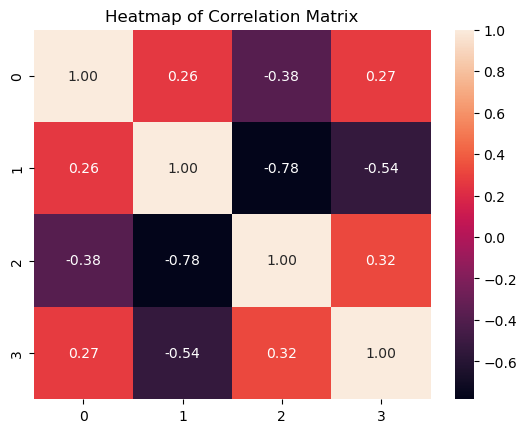

In [18]:
# Display the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

- The closer the correlation coefficient of 2 features is to 1, the more directly proportional they are; the closer it is to -1, the more inversely proportional they are. The closer it is to 0, the more independent they are from each other.

- Since the features that are dependent on each other will give us the same idea, one of them will be unnecessary. For this reason, the dimension should be reduced by selecting the 2 most independent features.

- The correlation coefficient of variance and skewness is 0.26 and it is the closest coefficient to 0. Therefore, variance and skewness should be selected.

3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [19]:
# Select two features
# Select these features from the original feature set
reduced_X_train = standardized_X_train[:,[0,1]]
reduced_X_train

array([[-0.91161854,  0.23319635],
       [-0.8605641 , -0.58352423],
       [-0.39733391,  0.16120049],
       ...,
       [-0.88574306, -0.14163922],
       [-1.04820482, -0.50622719],
       [-1.12426409, -1.31765681]])

#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [20]:
## Train the Perceptron model on the training set.
reduced_model = perceptron(reduced_X_train, y_train)
weights = reduced_model[0]
bias = reduced_model[1].item()

# Predicting on the training data
accuracy_train = accuracy(reduced_X_train, y_train, weights, bias)[0]
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.8258887876025525


- When 2 features are selected, it is seen that accuracy decreases. Because the effect of the other 2 features that are not selected is ignored. Even though we select the 2 features with the least correlation.

2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

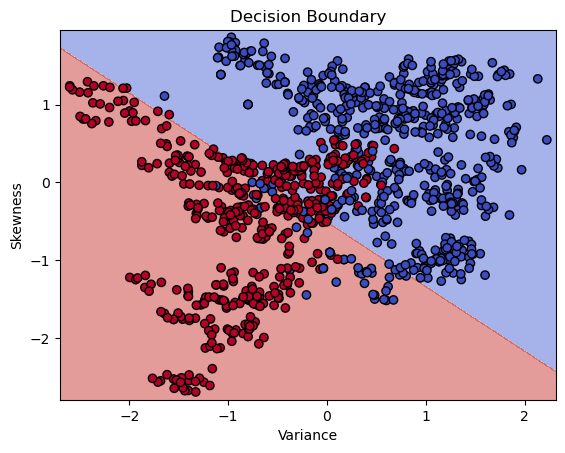

In [21]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, feature_name_1, feature_name_2):
    weights = model[0]
    bias = model[1]
    
    x_min = X[:, 0].min() - 0.1
    x_max = X[:, 0].max() + 0.1
    y_min = X[:, 1].min() - 0.1
    y_max = X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  np.arange(y_min, y_max, 0.01))

    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
    Z = np.where(Z >= 0, 1, -1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

    plt.xlabel(feature_name_1)
    plt.ylabel(feature_name_2)
    plt.title('Decision Boundary')
    plt.show()
    
    
# Plot the decision boundary using the selected features and trained model
plot_decision_boundary(reduced_X_train, y_train, reduced_model, "Variance", "Skewness")

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., variance and entropy) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

Answer the guiding
questions:
1. How does the decision boundary change when you use different pairs of features?
2. Can you find a pair of features that leads to better separation between the two
classes?

**Selected Features: Variance and Kurtosis**

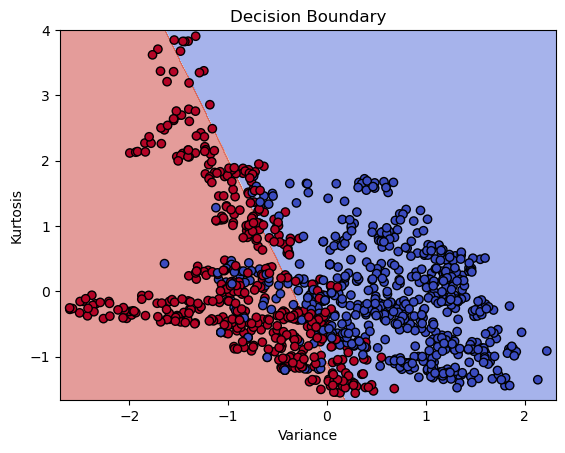

Training Accuracy: 0.8249772105742935


**Selected Features: Variance and Entropy**

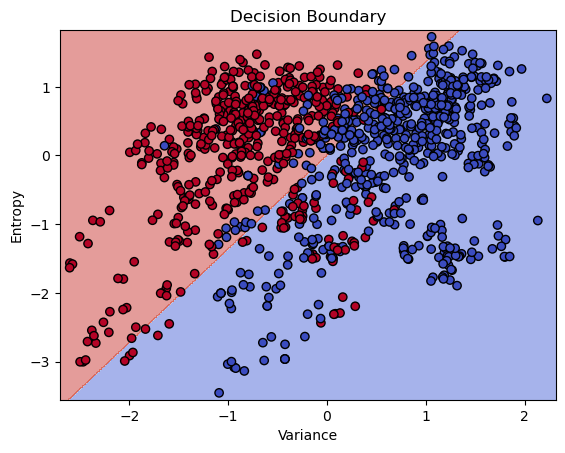

Training Accuracy: 0.8176845943482224


**Selected Features: Skewness and Kurtosis**

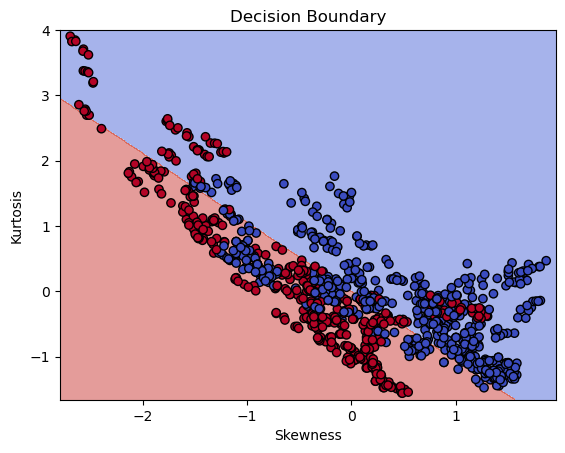

Training Accuracy: 0.7265268915223336


**Selected Features: Skewness and Entropy**

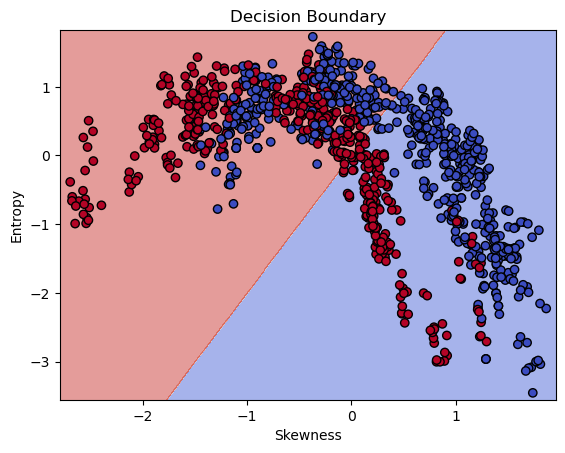

Training Accuracy: 0.6034639927073838


**Selected Features: Kurtosis and Entropy**

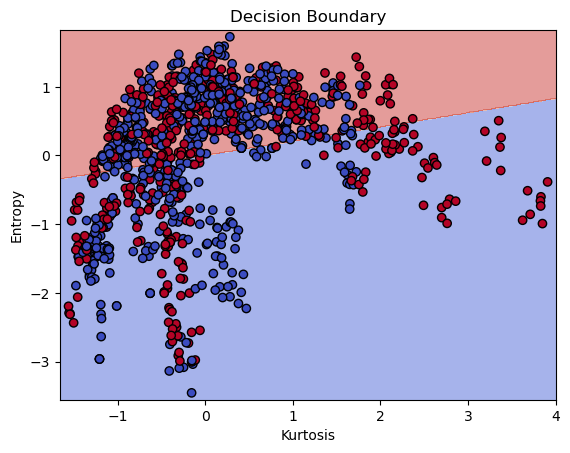

Training Accuracy: 0.45396536007292615


In [22]:
def try_two_features(feature1, feature2, feature_name_1, feature_name_2):
    display(Markdown(f"**{'Selected Features: ' + feature_name_1 + ' and ' + feature_name_2}**"))
    
    selected_features = standardized_X_train[:,[feature1,feature2]]
    reduced_model = perceptron(selected_features, y_train)
    
    weights = reduced_model[0]
    bias = reduced_model[1].item()
    
    accuracy_train = accuracy(selected_features, y_train, weights, bias)[0]
    plot_decision_boundary(selected_features, y_train, reduced_model, feature_name_1, feature_name_2)
    
    print("Training Accuracy: " + str(accuracy_train))
    
try_two_features(0,2, "Variance", "Kurtosis")
try_two_features(0,3, "Variance", "Entropy") 
try_two_features(1,2, "Skewness", "Kurtosis") 
try_two_features(1,3, "Skewness", "Entropy") 
try_two_features(2,3, "Kurtosis", "Entropy") 

- It shows significant changes according to the Pair of Features. Especially in nested features, accuracy drops significantly.

- The best pair was the one with the least correlation. However, it cannot be said that accuracy decreases as the correlation coefficient moves away from 0. Because the skewness-kurtosis pair with the highest correlation coefficient gave higher accuracy than the other pairs. Also, the correlation coefficient of the kurtosis-entropy pair with the lowest accuracy is close to 0 (0.32).

#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of
the dataset and progressively add more data points to train the Perceptron.

2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

#### Step 5: Analyzing the Hyperplane (5 points)

After running the experiments, analyze the hyperplane’s behavior across different feature
sets and data inputs. Reflect on how the Perceptron algorithm adapts to the data and how
different feature combinations lead to different decision boundaries.

- According to the algorithm, if each data point is classified incorrectly, it wants to pull the hyperplane towards itself and make the point it is located in its own class. Therefore, every change in the dataset can change the position of the hyperlane.

- The decision boundary wants to gather one of the classes on one side and the other class on the other side. If the classes are linearly separable, it wants to make this separation with a straight line from the point where they are separated. If it is not linearly separable, it cannot find this separation but still draws the boundary in a way that is closest to the line.

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)

In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [23]:
def fisher_ld_projection(X, y):
    """Compute Fisher's Linear Discriminant projection direction."""
    
    dataset = np.hstack((X, y))
    features_of_class_1 = dataset[dataset[:, 2] == 1, :2]
    features_of_class_2 = dataset[dataset[:, 2] == -1, :2]
    
    mean_vector_of_class_1 = np.mean(features_of_class_1, axis=0)
    mean_vector_of_class_2 = np.mean(features_of_class_2, axis=0)
    
    #finding with-in class scatter matrice
    diff_matrice_of_class_1 = features_of_class_1 - mean_vector_of_class_1
    diff_matrice_of_class_2 = features_of_class_2 - mean_vector_of_class_2
    
    transpose_of_diff_matrice_of_class_1 = np.transpose(diff_matrice_of_class_1)
    transpose_of_diff_matrice_of_class_2 = np.transpose(diff_matrice_of_class_2)
    
    covariance_matrice_of_class_1 = np.dot(transpose_of_diff_matrice_of_class_1, diff_matrice_of_class_1)
    covariance_matrice_of_class_2 = np.dot(transpose_of_diff_matrice_of_class_2, diff_matrice_of_class_2)
    
    with_in_class_scatter_matrice = covariance_matrice_of_class_1 + covariance_matrice_of_class_2
    
    #finding direction
    diff_of_mean_vectors = mean_vector_of_class_2 - mean_vector_of_class_1
    
    inverse_of_with_in_class_matrice =  np.linalg.inv(with_in_class_scatter_matrice)
    
    direction = np.dot(inverse_of_with_in_class_matrice, diff_of_mean_vectors)
    
    norm_of_direction = np.linalg.norm(direction)
    
    normalized_direction = direction / norm_of_direction
    
    return normalized_direction

def project_data(X, direction):
    """Project data onto the Fisher LD direction."""
    projected_data = np.dot(X, direction)
    return projected_data


In [24]:
direction = fisher_ld_projection(reduced_X_train, y_train)

# Project the data onto the Fisher LD direction
projected_data = project_data(reduced_X_train, direction)

While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

In [25]:
# Plot the 2D data with the projection direction

# Hint: You can use plt.scatter() to plot the 2D data with its features
# You can find the mean of the entire dataset for placing the direction vector
# Hint: You can use plt.quiver() method to visualize the direction vector 
# Do not forget to scale the direction vector to visualize it properly
scale = 4 # Adjust this to control the length of the direction line

Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

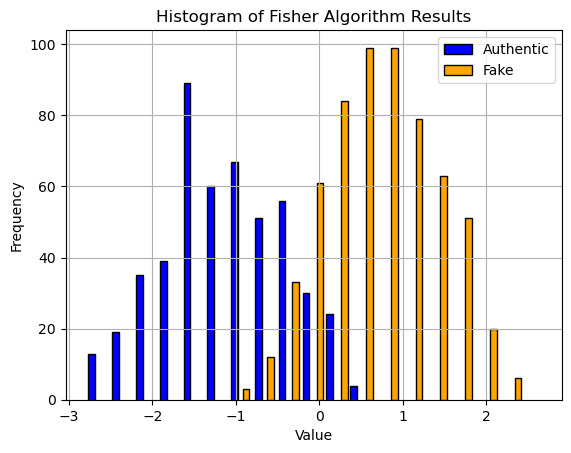

In [26]:
# Plot the histogram of the projected data

bins = np.linspace(0.2, 1.2, 20)

plt.hist(projected_data[y_train.flatten() == 1], bins=12, alpha=1, color='blue', label='Authentic', edgecolor='black', width=0.08, align='left')
plt.hist(projected_data[y_train.flatten() == -1], bins=12, alpha=1, color='orange', label='Fake', edgecolor='black', width=0.08, align='right')


plt.title('Histogram of Fisher Algorithm Results')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

- The more linearly separable the classes are, the better the Fisher algorithm works. It collects the data on different sides by looking at the direction perpendicular to the data separation.

- In both, classes are generally separated on certain sides. However, in the perceptron graph, a complex image is formed due to the intertwined data at the separation point. In the graph of the Fisher algorithm, it is more clearly seen how much of which data is in which region in the complex part